In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
veicoli = pd.read_csv('data' + os.sep + "vehicles_on_trentino_webcams.csv")

In [3]:
veicoli.timestamp = pd.to_datetime(veicoli.timestamp)

In [4]:
veicoli = veicoli.set_index('timestamp')

In [5]:
veicoli['anno'] = veicoli.index.year
veicoli['mese'] = veicoli.index.month
veicoli['giorno'] = veicoli.index.day
veicoli['giorno_settimana'] = veicoli.index.weekday
veicoli['ora'] = veicoli.index.hour
veicoli['minuti'] = veicoli.index.minute

In [6]:
veicolixora = {}
orari = []
num_veicoli = []
for t in range(0,24):
    tmax = t+1
    v = 0
    if t == 23:
        v = veicoli[(veicoli.ora>=t)].veicoli.sum()
    else:
        v = veicoli[(veicoli.ora>=t) & (veicoli.ora < tmax)].veicoli.sum()
    orari.append(t)
    num_veicoli.append(v)
veicolixora['orario'] = orari
veicolixora['num_veicoli'] = num_veicoli


In [7]:
veicolixora = pd.DataFrame(veicolixora)

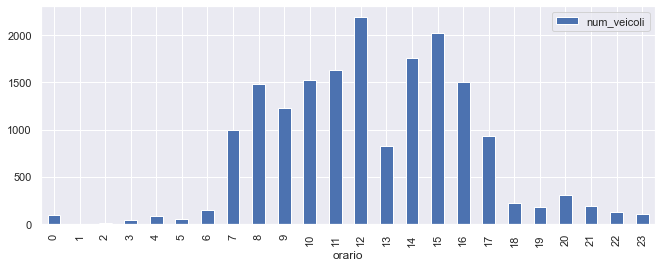

In [8]:
veicolixora.plot.bar(x='orario', y='num_veicoli')
plt.show()

In [9]:
import matplotlib.dates as mdates

/home/napo/.local/lib/python3.9/site-packages/pandas/core/indexing.py:831: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


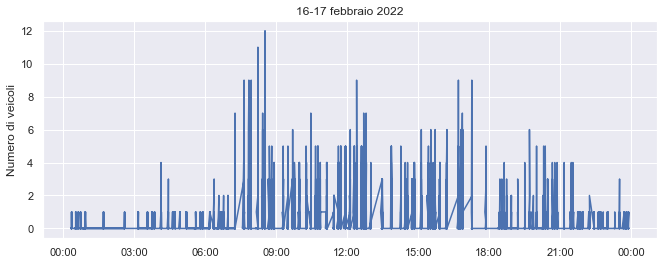

In [10]:
fig, ax = plt.subplots()
ax.plot(veicoli.loc['2022-02-17 00:00':'2022-02-17 23:59:00', 'veicoli']) #, marker='o')
ax.set_ylabel('Numero di veicoli')
ax.set_title('16-17 febbraio 2022')
# Set x-axis major ticks to weekly interval, on Mondays
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

In [11]:
times_sample = pd.date_range('2022-02-17', '2022-03-17', freq='H')

In [12]:
veicoli_orari = veicoli.loc[times_sample, ['veicoli']].copy()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index([2022-02-17 00:00:00, 2022-02-17 01:00:00, 2022-02-17 02:00:00,\n       2022-02-17 03:00:00, 2022-02-17 04:00:00,\n       ...\n       2022-03-16 20:00:00, 2022-03-16 21:00:00, 2022-03-16 22:00:00,\n       2022-03-16 23:00:00, 2022-03-17 00:00:00],\n      dtype='object', name='timestamp', length=671). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"